Cleaning data


In [40]:
#Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import random 
import csv 
import datetime
import scipy.stats as stats #NEW
from scipy.stats import f_oneway #NEW
from scipy.stats import linregress
import numpy as np
from config import api_key
import time

In [41]:
#Accessing data on CSV files
daily_data = pd.read_csv("resources/worldometer_coronavirus_daily_data.csv")
summary_data = pd.read_csv("resources/worldometer_coronavirus_summary_data.csv")
daily_data

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020/2/15,Afghanistan,0,NaN,0.0,0.0,NaN
1,2020/2/16,Afghanistan,0,NaN,0.0,0.0,NaN
2,2020/2/17,Afghanistan,0,NaN,0.0,0.0,NaN
3,2020/2/18,Afghanistan,0,NaN,0.0,0.0,NaN
4,2020/2/19,Afghanistan,0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
184782,2022/5/10,Zimbabwe,248642,106.0,963.0,5481.0,2.0
184783,2022/5/11,Zimbabwe,248778,136.0,1039.0,5481.0,0.0
184784,2022/5/12,Zimbabwe,248943,165.0,1158.0,5481.0,0.0
184785,2022/5/13,Zimbabwe,249131,188.0,1283.0,5482.0,1.0


In [42]:
# First, we created a dictionary with all 6 continents, and couple countries per continent. 
"""continents = {
    "Africa": ["Algeria", "Nigeria", "Kenya", "Egypt", "South Africa"],
    "Asia": ["China", "India", "Japan", "South Korea", "Russia"],
    "Europe": ["France", "Germany", "Italy", "Spain", "United Kingdom"],
    "North America": ["USA", "Canada", "Mexico", "Jamaica", "Costa Rica"],
    "South America": ["Brazil", "Argentina", "Colombia", "Peru", "Chile"],
    "Oceania": ["Australia", "New Zealand", "Fiji", "Papua New Guinea", "Vanuatu"]
}"""


'continents = {\n    "Africa": ["Algeria", "Nigeria", "Kenya", "Egypt", "South Africa"],\n    "Asia": ["China", "India", "Japan", "South Korea", "Russia"],\n    "Europe": ["France", "Germany", "Italy", "Spain", "United Kingdom"],\n    "North America": ["USA", "Canada", "Mexico", "Jamaica", "Costa Rica"],\n    "South America": ["Brazil", "Argentina", "Colombia", "Peru", "Chile"],\n    "Oceania": ["Australia", "New Zealand", "Fiji", "Papua New Guinea", "Vanuatu"]\n}'

In [43]:
# We randomly selected 1 country per continent to based our project on. 
"""country_list = []
for continent, countries in continents.items():
      random_country = random.choice(countries)
      country_list.append(random_country)
country_list"""


'country_list = []\nfor continent, countries in continents.items():\n      random_country = random.choice(countries)\n      country_list.append(random_country)\ncountry_list'

In [44]:
continents = {
    "Africa": ["Algeria", "Nigeria", "Kenya", "Egypt", "South Africa"],
    "Asia": ["China", "India", "Japan", "South Korea", "Russia"],
    "Europe": ["France", "Germany", "Italy", "Spain", "United Kingdom"],
    "North America": ["USA", "Canada", "Mexico", "Jamaica", "Costa Rica"],
    "South America": ["Brazil", "Argentina", "Colombia", "Peru", "Chile"],
    "Oceania": ["Australia", "New Zealand", "Fiji", "Papua New Guinea", "Vanuatu"]
}
random_country_list = []
for continent, countries in continents.items():
      random_country = random.choice(countries)
      random_country_list.append(random_country)
random_country_list

['Kenya', 'China', 'France', 'Costa Rica', 'Colombia', 'Australia']

In [45]:
#Randomly selected countries for this project using the code above.
country_list = ['Algeria', 'Russia', 'France', 'Canada', 'Peru', 'Australia']

In [46]:
#Broke date by year and month in order to choose only dates from year 2021
#Used the months do sum up values per monthly basis
#Renaming columns
selected_data_daily = daily_data[daily_data["country"].isin(country_list)].copy()
selected_data_daily["date"] = pd.to_datetime(selected_data_daily["date"])
selected_data_daily["Year"] = (selected_data_daily["date"]).dt.year
selected_data_daily["Month"] = (selected_data_daily["date"]).dt.month
selected_data_daily = selected_data_daily[selected_data_daily["Year"] == 2021]
selected_data_daily["country"].astype("str")
selected_data_daily

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,Year,Month
1961,2021-01-01,Algeria,99897,287.0,29740.0,2762.0,6.0,2021,1
1962,2021-01-02,Algeria,100159,262.0,29779.0,2769.0,7.0,2021,1
1963,2021-01-03,Algeria,100408,249.0,29828.0,2772.0,3.0,2021,1
1964,2021-01-04,Algeria,100645,237.0,29869.0,2777.0,5.0,2021,1
1965,2021-01-05,Algeria,100873,228.0,29906.0,2782.0,5.0,2021,1
...,...,...,...,...,...,...,...,...,...
135448,2021-12-27,Russia,10415230,23210.0,816589.0,305155.0,937.0,2021,12
135449,2021-12-28,Russia,10437152,21922.0,793615.0,306090.0,935.0,2021,12
135450,2021-12-29,Russia,10458271,21119.0,771026.0,307022.0,932.0,2021,12
135451,2021-12-30,Russia,10479344,21073.0,748169.0,307948.0,926.0,2021,12


In [47]:
#Summing up the daily new casis and daily new deaths
by_country = selected_data_daily.groupby(["Year","country","Month"])["daily_new_cases", "daily_new_deaths"].sum().reset_index()

by_country.head()

C:\Users\fial_\AppData\Local\Temp\ipykernel_9876\294523454.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_country = selected_data_daily.groupby(["Year","country","Month"])["daily_new_cases", "daily_new_deaths"].sum().reset_index()


,Year,country,Month,daily_new_cases,daily_new_deaths
0,2021,Algeria,1,7729.0,135.0
1,2021,Algeria,2,5753.0,92.0
2,2021,Algeria,3,4100.0,110.0
3,2021,Algeria,4,4916.0,160.0
4,2021,Algeria,5,6805.0,219.0


In [48]:
summary_data


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277
...,...,...,...,...,...,...,...,...,...,...,...,...
221,Wallis And Futuna Islands,Australia/Oceania,454,7.0,438.0,9.0,NaN,41755,644.0,20508.0,1886140.0,10873
222,Western Sahara,Africa,10,1.0,9.0,0.0,NaN,16,2.0,NaN,NaN,624681
223,Yemen,Asia,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015
224,Zambia,Africa,320591,3983.0,315997.0,611.0,NaN,16575,206.0,3452554.0,178497.0,19342381


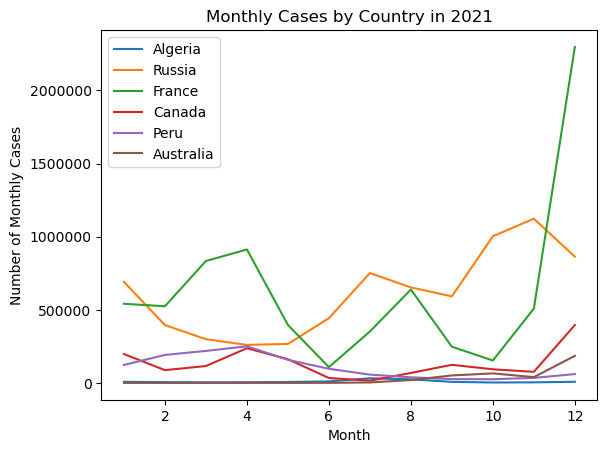

In [49]:
#Line plot chart to show monthly cases by country by month
for c in country_list:
    df_country = by_country[by_country['country'] == c]
    plt.plot(df_country['Month'], df_country['daily_new_cases'], label=c)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Number of Monthly Cases')
plt.title('Monthly Cases by Country in 2021')
plt.legend()
plt.savefig("output_data/Fig1.png", bbox_inches='tight')
plt.show()

increase rate for different countries through months; if there is any relationship between increse rate and month

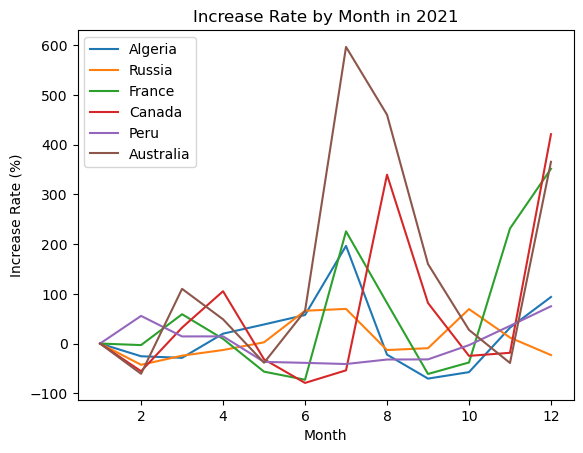

In [50]:
#Group by country and graph the increase reate and % change deaths

by_country['Increase Rate'] = round(by_country.groupby('country')['daily_new_cases'].pct_change() * 100,2)
by_country['% Death Rate'] = round(by_country.groupby('country')['daily_new_deaths'].pct_change() * 100,2)
by_country = by_country.fillna(0)


#visualize it
for c in country_list:
    df_country = by_country[by_country['country'] == c]
    plt.plot(df_country['Month'], df_country['Increase Rate'], label=c)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Increase Rate (%)')
plt.title('Increase Rate by Month in 2021')
plt.legend()
plt.savefig("output_data/Fig2.png", bbox_inches='tight')
plt.show()


for each continent we give numbers to countries, compare the death cases/daily new cases

In [51]:
continents_df = pd.DataFrame(continents)
continents_df = pd.melt(continents_df)
continents_df.columns = ["Continents", "country"]
new_selected_data = pd.merge(continents_df, daily_data, how="inner", on="country")

new_selected_data

,Continents,country,date,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,Africa,Algeria,2020/2/15,0,NaN,0.0,0.0,NaN
1,Africa,Algeria,2020/2/16,0,NaN,0.0,0.0,NaN
2,Africa,Algeria,2020/2/17,0,NaN,0.0,0.0,NaN
3,Africa,Algeria,2020/2/18,0,NaN,0.0,0.0,NaN
4,Africa,Algeria,2020/2/19,0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
23799,Oceania,Vanuatu,2022/5/10,8080,24.0,430.0,14.0,0.0
23800,Oceania,Vanuatu,2022/5/11,8144,64.0,455.0,14.0,0.0
23801,Oceania,Vanuatu,2022/5/12,8241,97.0,502.0,14.0,0.0
23802,Oceania,Vanuatu,2022/5/13,8289,48.0,399.0,14.0,0.0


In [52]:
new_selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23804 entries, 0 to 23803
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Continents               23804 non-null  object 
 1   country                  23804 non-null  object 
 2   date                     23804 non-null  object 
 3   cumulative_total_cases   23804 non-null  int64  
 4   daily_new_cases          23218 non-null  float64
 5   active_cases             22164 non-null  float64
 6   cumulative_total_deaths  23804 non-null  float64
 7   daily_new_deaths         22670 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


In [53]:
# NEW CHANGED THIS code
new_selected_data.loc[:, "date"] = pd.to_datetime(new_selected_data["date"])
new_selected_data.loc[:, "Year"] = pd.DatetimeIndex(new_selected_data["date"]).year
new_selected_data.loc[:, "Month"] = pd.DatetimeIndex(new_selected_data["date"]).month
new_selected_data.loc[:, "country"] = new_selected_data["country"].astype(str)
new_selected_data = new_selected_data[new_selected_data["Year"] == 2021]
new_selected_data = new_selected_data.groupby(["Year", "Continents", "Month"])["daily_new_cases"].sum().reset_index()

C:\Users\fial_\AppData\Local\Temp\ipykernel_9876\1991558189.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_selected_data.loc[:, "date"] = pd.to_datetime(new_selected_data["date"])


In [54]:
new_selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             72 non-null     int64  
 1   Continents       72 non-null     object 
 2   Month            72 non-null     int64  
 3   daily_new_cases  72 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ KB


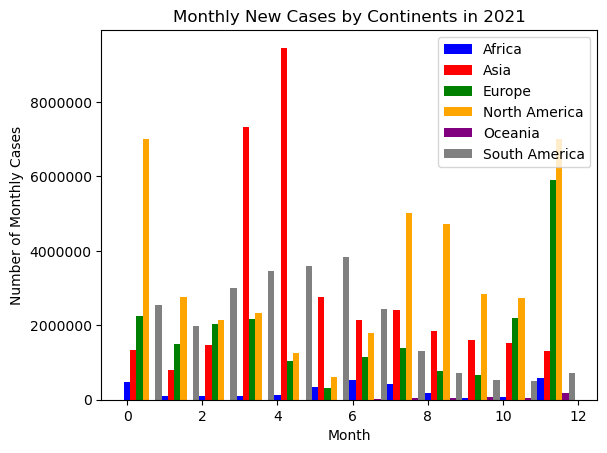

In [55]:
continents_list = new_selected_data["Continents"].unique().tolist()

# Defined the colors for each continent
colors = ['blue', 'red', 'green', 'orange', 'purple', 'grey']

# Calculate the width of each bar
bar_width = 1 / len(continents_list)

# for loop for each continent and plot the bars
for i, t in enumerate(continents_list):
    df_continent = new_selected_data[new_selected_data['Continents'] == t]
    x = [j + i * bar_width for j in range(len(df_continent['Month']))]
    y = df_continent['daily_new_cases']
    plt.bar(x, y, width=bar_width, label=t, color=colors[i])

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Number of Monthly Cases')
plt.title('Monthly New Cases by Continents in 2021')
plt.legend()

# Show the plot
plt.savefig("output_data/Fig3.png", bbox_inches='tight')
plt.show()



In [56]:
#New
# Merge with population data
merged_df = pd.merge(by_country, summary_data[["country", "population"]], on="country")

# Calculate daily new cases per 1 million population
merged_df["cases_per_million"] = (merged_df["daily_new_cases"] / merged_df["population"]) * 1000000
merged_df.rename(columns={'country':'Country', 'daily_new_cases': "Monthly new cases", "daily_new_deaths":"Monthly new deaths"}, inplace=True)

merged_df

,Year,Country,Month,Monthly new cases,Monthly new deaths,Increase Rate,% Death Rate,population,cases_per_million
0,2021,Algeria,1,7729.0,135.0,0.00,0.00,45325517,170.522048
1,2021,Algeria,2,5753.0,92.0,-25.57,-31.85,45325517,126.926296
2,2021,Algeria,3,4100.0,110.0,-28.73,19.57,45325517,90.456773
3,2021,Algeria,4,4916.0,160.0,19.90,45.45,45325517,108.459877
4,2021,Algeria,5,6805.0,219.0,38.43,36.87,45325517,150.136180
...,...,...,...,...,...,...,...,...,...
67,2021,Russia,8,653092.0,24661.0,-13.07,5.62,146050996,4471.670977
68,2021,Russia,9,592061.0,24031.0,-9.34,-2.55,146050996,4053.796388
69,2021,Russia,10,1002764.0,31283.0,69.37,30.18,146050996,6865.848419
70,2021,Russia,11,1123091.0,36655.0,12.00,17.17,146050996,7689.718186


In [57]:
# Descriptive statistics
statistics_by_country= merged_df.groupby('Country')

for country, x in statistics_by_country:
    print("Country:", country)
    print("Mean Monthly Cases in 2021:", round(x['Monthly new cases'].mean(), 0))
    print("Standard Deviation of Monthly Cases in 2021:", round(x['Monthly new cases'].std(), 0))
    print("Median Monthly Cases in 2021:", round(x['Monthly new cases'].median(), 0))
    print("Maximum Daily Monthly Cases in 2021:", round(x['Monthly new cases'].max(), 0))
    print("Minimum Monthly Cases in 2021:", round(x['Monthly new cases'].min(), 0))
    print("")

Country: Algeria
Mean Monthly Cases in 2021: 9902.0
Standard Deviation of Monthly Cases in 2021: 8937.0
Median Monthly Cases in 2021: 7042.0
Maximum Daily Monthly Cases in 2021: 31766.0
Minimum Monthly Cases in 2021: 3093.0

Country: Australia
Mean Monthly Cases in 2021: 30592.0
Standard Deviation of Monthly Cases in 2021: 53915.0
Median Monthly Cases in 2021: 2012.0
Maximum Daily Monthly Cases in 2021: 185265.0
Minimum Monthly Cases in 2021: 159.0

Country: Canada
Mean Monthly Cases in 2021: 133910.0
Standard Deviation of Monthly Cases in 2021: 104480.0
Median Monthly Cases in 2021: 104464.0
Maximum Daily Monthly Cases in 2021: 395809.0
Minimum Monthly Cases in 2021: 15541.0

Country: France
Mean Monthly Cases in 2021: 626140.0
Standard Deviation of Monthly Cases in 2021: 580953.0
Median Monthly Cases in 2021: 516538.0
Maximum Daily Monthly Cases in 2021: 2297296.0
Minimum Monthly Cases in 2021: 107977.0

Country: Peru
Mean Monthly Cases in 2021: 106808.0
Standard Deviation of Monthly

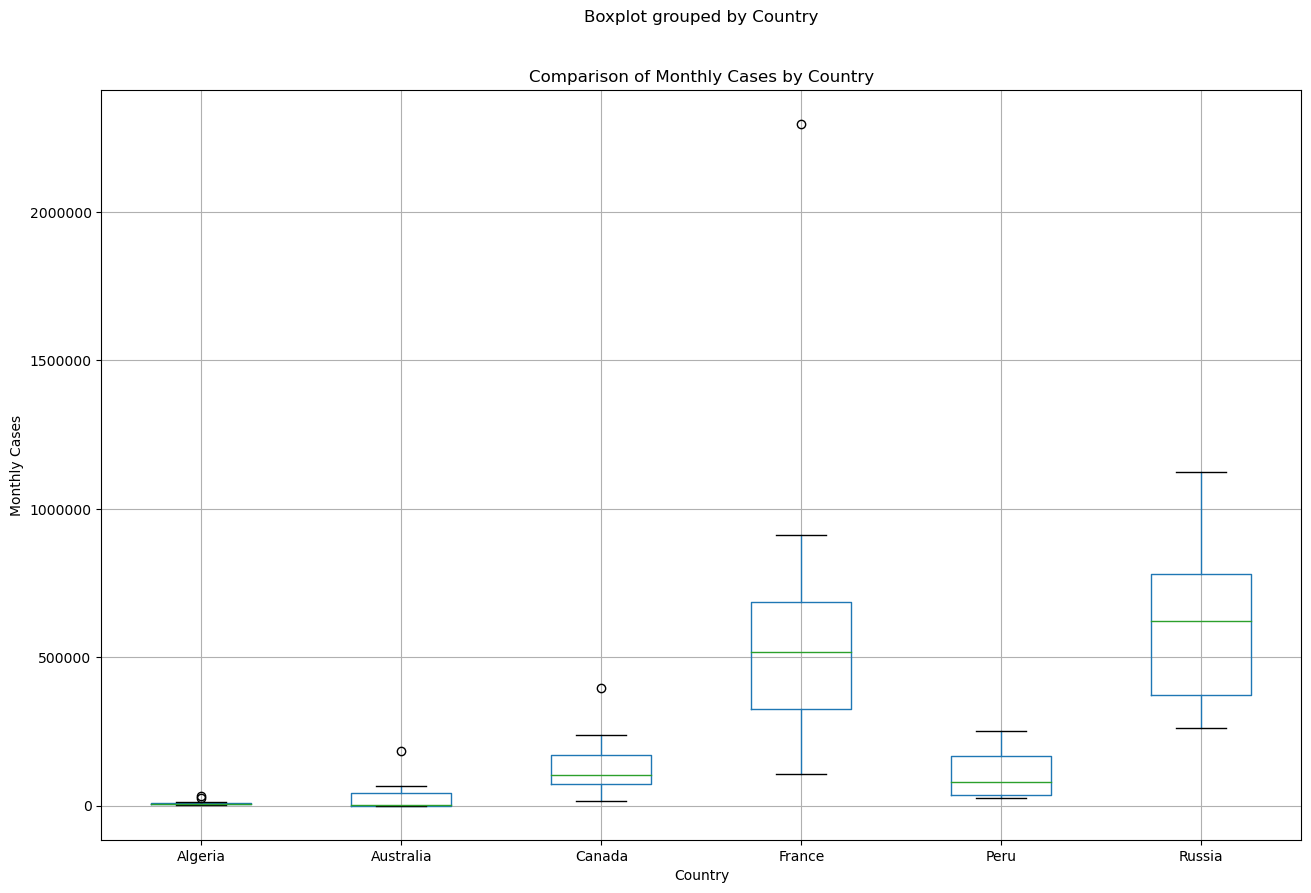

In [58]:
box_df = merged_df[merged_df['Country'].isin(country_list)]

# Create a boxplot to compare means
box_df.boxplot('Monthly new cases', by='Country', figsize=(15, 10))

# Set labels and title
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Country')
plt.ylabel('Monthly Cases')
plt.title('Comparison of Monthly Cases by Country')


# Show the plot
plt.savefig("output_data/Fig4.png", bbox_inches='tight')
plt.show()


In [59]:
# Perform t-test to compare mean monthly new cases between two countries
from scipy.stats import ttest_ind

country1_cases = merged_df[merged_df["Country"] == "France"]["Monthly new cases"]
country2_cases = merged_df[merged_df["Country"] == "Russia"]["Monthly new cases"]
t_statistic, p_value = ttest_ind(country1_cases, country2_cases)

# Print the test result
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.0769452772096377
P-Value: 0.9393625741104167


In [60]:
# By default, the ttest_ind() function uses a significance level of 0.05
# Based on the results of the t-test, where the T-Statistic is 0.0769 and the P-Value is 0.9394, 
#we can conclude that:

#The T-Statistic measures the difference between the means of the two groups (France and Russia) 
#relative to the variability within each group. In this case, the T-Statistic of 0.0769 indicates 
#a very small difference between the means of the two groups.

#The P-Value of 0.9394 represents the probability of observing such a small difference in means 
#or a more extreme difference, assuming that the null hypothesis is true 
#(there is no significant difference between the means of France and Russia).

#the P-Value is greater than the typical significance level of 0.05, 
#we fail to reject the null hypothesis. In other words there is not enough evidence 
#to conclude that there is a significant difference in the mean number of monthly cases 
#between France and Russia.

#based on the t-test results, we do not have enough evidence to suggest that France and Russia 
#have significantly different mean numbers of monthly cases.

In [61]:
#ANOVA testing

# Extract the cases data for each country
data = []
for c in country_list:
    data.append(merged_df[merged_df["Country"] == c]["Monthly new cases"])

statistic, p_value = f_oneway(*data)

# Print the results
print(f"The statistic value is: {statistic}")
print(f"The P-Value is: {p_value}")

The statistic value is: 13.435378940094392
The P-Value is: 4.897637738181195e-09


In [62]:
#Null Hypothesis H0: There is no significant difference in the mean number of monthly new cases among the selected countries.

#Alternate Hypothesis H1: There is a significant difference in the mean number of monhtly cases among the the selected countries.

#we can infer that there are significant differences in the daily new cases among the countries. 
#The low P-value suggests that the observed differences are unlikely to have occurred by chance alone. 
#Therefore, we reject the null hypothesis and conclude that there are statistically significant differences in 
#the mean monhtly cases among the countries.

The r-value is: 0.5836565143835508


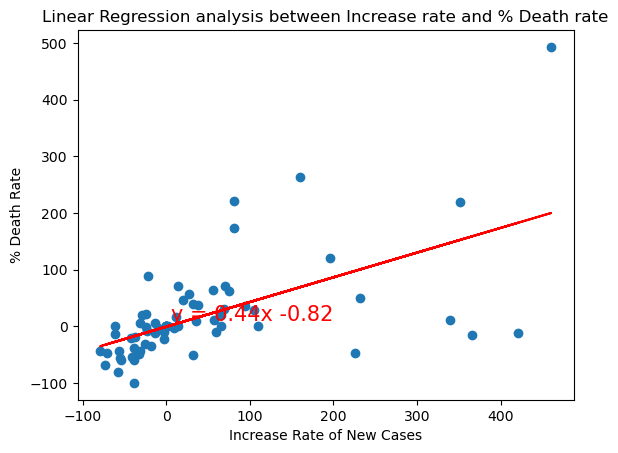

In [63]:
#linear regression test to see the relaitonship between increase rate and population
by_country = by_country[by_country['% Death Rate']!= np.inf]
by_country = by_country[by_country['Increase Rate']!= np.inf]
death_r = by_country["% Death Rate"]
increase_r = by_country["Increase Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(increase_r, death_r)
regress_values = increase_r * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.scatter(increase_r, death_r)
plt.xlabel("Increase Rate of New Cases")
plt.ylabel("% Death Rate")
plt.title("Linear Regression analysis between Increase rate and % Death rate")
plt.plot(increase_r,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("output_data/Fig5.png", bbox_inches='tight')
print(f'The r-value is: {rvalue}')

In [72]:
#Creating a .txt file to print the information into.
country_api_news = "output_data/news_output.txt"

with open(country_api_news, "w") as file:
    #forloop to go through the countries to search for NY Times news
    for country in country_list:
        # Make the request to the New York Times API
        url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?q={country}+COVID&api-key={api_key}"
        response = requests.get(url)

        # Parse the response and extract relevant information
        if response.status_code == 200:
            data = response.json()
            articles = data["response"]["docs"]

            # Display the relevant information for the first article
            if articles:
                article = articles[0]
                headline = article["headline"]["main"]
                snippet = article["snippet"]
                file.write(f"News related to {country} and COVID:\n")
                file.write("Headline:" + headline + "\n")
                file.write("Snippet:" + snippet + "\n")
                file.write("\n")
            else:
                print(f"No news found for {country} and COVID\n")
        else:
            print(f"Error: {response.status_code}\n")

        time.sleep(2)
with open(country_api_news, "r") as file:
    content = file.read()
    print(content)

Error: 429

News related to Algeria and COVID:
Headline:Algeria Raises Oil Price
Snippet:

News related to Russia and COVID:
Headline:Why It Seems Everything We Knew About the Global Economy Is No Longer True
Snippet:While the world’s eyes were on the pandemic, China and the war in Ukraine, the paths to prosperity and shared interests have grown murkier.

News related to France and COVID:
Headline:Thousands Join Convoy to Paris to Protest France’s Covid Measures
Snippet:Inspired by trucker-led protests in Canada, French demonstrators set out from cities across the country in thousands of vehicles to oppose virus restrictions.

News related to Canada and COVID:
Headline:Alberta’s Vote Will Test American-Style Far-Right Politics
Snippet:An election in Alberta will be a test of a premier who has said that she models her politics after those of prominent right-wing U.S. politicians.

News related to Peru and COVID:
Headline:Two Former Peruvian Leaders Share the Same Jail. Another May Soon 